<a href="https://colab.research.google.com/github/PSheva/neural-networks/blob/main/NN_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# base function assignment
def base_func(x,y):
  return (5*(x**2) + ((y/2)**2))
# plot building
def build_plot(fit_reults_ffb):
  plt.plot(fit_reults_ffb.history['loss'], label='Training loss')
  plt.plot(fit_reults_ffb.history['val_loss'], label='Validation loss')
  plt.xlabel =('Epochs')
  plt.ylabel = ('Loss')
  plt.legend()
  plt.show()

# model compiling
def compile_model(model:tf.keras.models.Sequential):
  model.compile(optimizer='adam', loss='mean_absolute_error')



In [ ]:
# randon data filling
X = np.random.uniform(0, 10, size=(2000,2))
Y = np.array( [base_func(x[0],x[1]) for x in X ] )
split = int(len(X)*0.8)
train_x, train_y = X[:split], Y[:split]
test_x, test_y = X[split:], Y[split:]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
50/50 [==============================] - 4s 24ms/step - loss: 175.4219 - val_loss: 174.8582
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 173.8167 - val_loss: 173.0574
Epoch 3/200
50/50 [==============================] - 0s 5ms/step - loss: 171.6201 - val_loss: 170.5287
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 168.6077 - val_loss: 167.1647
Epoch 5/200
50/50 [========================

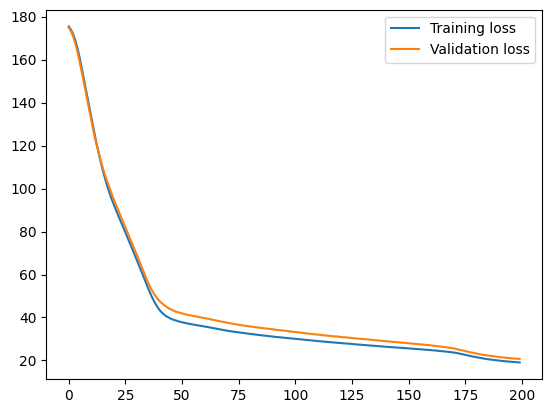

In [ ]:
# defining 1.1 model (feed forward backprop with 10 neurons)

model_ffb =tf.keras.models.Sequential(
    layers=[
        tf.keras.layers.Dense(10, activation='relu', input_dim=2),
        tf.keras.layers.Dense(1)       
    ]
)
compile_model(model_ffb)
model_ffb.summary()
fit_reults_ffb = model_ffb.fit(train_x, train_y, epochs=200, validation_data=(test_x,test_y))
build_plot(fit_reults_ffb)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                60        
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
50/50 [==============================] - 0s 3ms/step - loss: 18.9632 - val_loss: 20.5579
Epoch 2/200
50/50 [==============================] - 0s 2ms/step - loss: 18.9462 - val_loss: 20.4992
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 18.8064 - val_loss: 20.3915
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 18.7487 - val_loss: 20.3123
Epoch 5/200
50/50 [==============================]

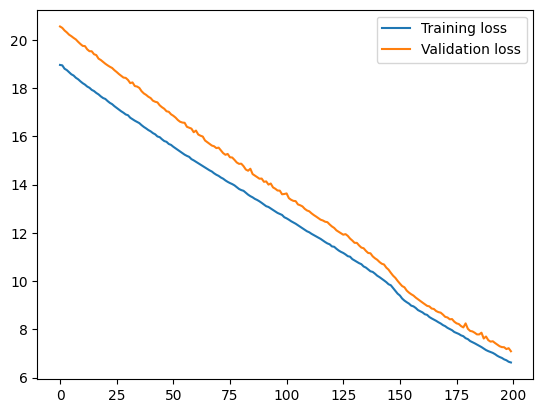

In [ ]:
# defining 1.2 model (feed forward backprop with 20 neurons)

model_ffb2 =tf.keras.models.Sequential()
model_ffb2.add(tf.keras.layers.Dense(20, activation='relu', input_dim=2))
model_ffb2.add(tf.keras.layers.Dense(1))
compile_model(model_ffb2)
model_ffb2.summary()
fit_reults_ffb2 = model_ffb.fit(train_x, train_y, epochs=200, validation_data=(test_x,test_y))
build_plot(fit_reults_ffb2)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 20)           60          ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 22)           0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 1)            23          ['concatenate[0][0]']        

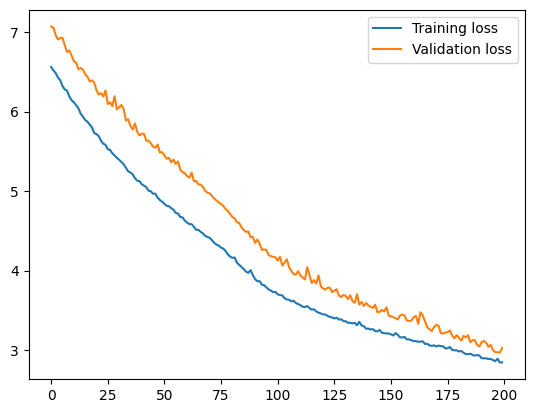

In [ ]:
# defining 2.1 model (cascade - forward backprop with 20 neurons)

inputs = tf.keras.Input(shape=(2,)) 
x = tf.keras.layers.Dense(20, activation='relu')(inputs) 
outputs = tf.keras.layers.Dense(1)(tf.keras.layers.concatenate([inputs, x]))
model_cfb = tf.keras.models.Model(inputs, outputs) 
model_cfb.summary()
compile_model(model_cfb)
fit_reults_cfb = model_ffb.fit(train_x, train_y, epochs=200, validation_data=(test_x,test_y))
build_plot(fit_reults_cfb)

# inputs = tf.keras.layers.Input(shape=(2,))
# x0 = tf.keras.layers.Dense(10, activation='relu')(inputs)
# x1 = tf.keras.layers.Dense(10, activation='relu')(tf.keras.layers.concatenate([inputs, x0]))
# outputs = tf.keras.layers.Dense(1)(tf.keras.layers.concatenate([inputs, x0, x1]))
# model_cfb2 = tf.keras.models.Model(inputs, outputs)
# model_cfb2.summary()
# compile_model(model_cfb2)
# fit_reults_cfb2 = model_cfb.fit(train_x, train_y, epochs=200, validation_data=(test_x, test_x))
# build_plot(fit_reults_cfb2)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 2)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 10)           30          ['input_2[0][0]']                
                                                                                                  
 concatenate_1 (Concatenate)    (None, 12)           0           ['input_2[0][0]',                
                                                                  'dense_6[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 10)           130         ['concatenate_1[0][0]']    

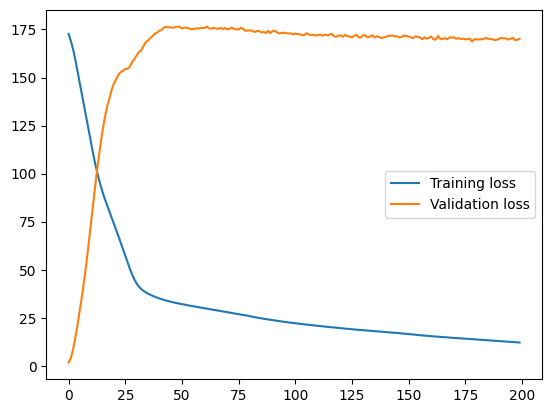

In [ ]:
# defining 2.2 model (cascade - forward backprop with 2 * 10 neurons)

inputs = tf.keras.layers.Input(shape=(2,))
x0 = tf.keras.layers.Dense(10, activation='relu')(inputs)
x1 = tf.keras.layers.Dense(10, activation='relu')(tf.keras.layers.concatenate([inputs, x0]))
outputs = tf.keras.layers.Dense(1)(tf.keras.layers.concatenate([inputs, x0, x1]))
model_cfb2 = tf.keras.models.Model(inputs, outputs)
model_cfb2.summary()
compile_model(model_cfb2)

fit_reults_cfb2 = model_cfb.fit(train_x, train_y, epochs=200, validation_data=(test_x, test_x))
build_plot(fit_reults_cfb2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 15)                270       
                                                                 
 dense_9 (Dense)             (None, 1)                 16        
                                                                 
Total params: 286
Trainable params: 286
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
50/50 [==============================] - 2s 11ms/step - loss: 174.3767 - val_loss: 172.9223
Epoch 2/200
50/50 [==============================] - 0s 4ms/step - loss: 170.7958 - val_loss: 168.9515
Epoch 3/200
50/50 [==============================] - 0s 6ms/step - loss: 166.1037 - val_loss: 163.8358
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 160.4366 - val_loss: 158.0072
Epoch 5/200
50/50 [====================

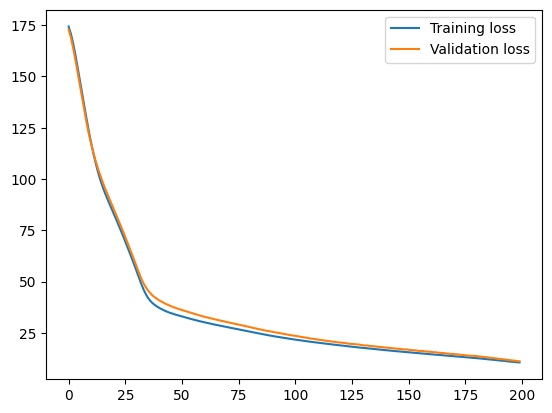

In [ ]:
# defining 3.1 model (elman backprop: 15 neurons )
model_el = tf.keras.Sequential(
    layers=[
        tf.keras.layers.SimpleRNN(15, activation='relu', input_shape=(1,2)),
        tf.keras.layers.Dense(1)    
    ]
)
model_el.summary()
compile_model(model_el)

# reshape size

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1])).astype(np.float32) 
# new shape = (1600, 1 ,2), previous shape = (1600,2)
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1])).astype(np.float32)
fit_results_el1 = model_el.fit(train_x,train_y, epochs=200, validation_data=(test_x,test_y))
build_plot(fit_results_el1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 5)                 40        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 5)                 30        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
50/50 [==============================] - 2s 9ms/step - loss: 175.7202 - val_loss: 175.8147
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 175.6505 - v

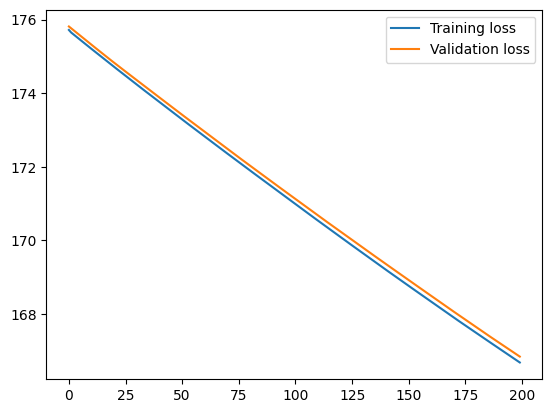

In [ ]:
# defining 3.1 model (elman backprop: 3*5 neurons )

model_el2 = tf.keras.models.Sequential(
    layers = [
        tf.keras.layers.SimpleRNN(5, activation='relu', input_shape=[1, 2]),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)
model_el2.summary()
compile_model(model_el2)

fit_results_el2 = model_el2.fit(train_x,train_y, epochs=200, validation_data=(test_x,test_y))
build_plot(fit_results_el2)

